#### Import libraries

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import os

In [225]:
# load dataset
dataset = pd.read_csv("/content/Bank Customer Churn Prediction.csv")
dataset

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Get informations from dataset (ex: data type)

In [226]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


There are 2 columns with object type (we need to transform it) and the other are integer or float.

drop customer_id column because it is unnecessary (in case we want to classified churn)

In [227]:
dataset = dataset.drop("customer_id", axis=1)
dataset

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Statistic Decription

Checking unique value for each column to determine it as categorical or not

In [228]:
for uniq in dataset:
  count = dataset[uniq].drop_duplicates().shape[0]
  print("", uniq, ": ", count)

 credit_score :  460
 country :  3
 gender :  2
 age :  70
 tenure :  11
 balance :  6382
 products_number :  4
 credit_card :  2
 active_member :  2
 estimated_salary :  9999
 churn :  2


In [229]:
# age, products_number, active_number, credit_card, tenure, and churn are categorical value
dataset[['credit_score', 'age', 'balance', 'estimated_salary']].describe()

,credit_score,age,balance,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


there is 0 minimum value in balance it look un normal and also for estimated salary minimum only 11.58 dollar

Handle Missing Values

Checking the total number null value of 'balance' column

In [230]:
balance = (dataset.balance==0).sum()
balance

3617

In [231]:
dataset.loc[(dataset['balance']==0)]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0


there is no spesific difference why the balance is 0, then we will fill it  with mean value

In [232]:
dataset['balance'] = dataset['balance'].mask(dataset['balance']==0).fillna(dataset['balance'].mean())

In [233]:
balance = (dataset.balance==0).sum()
balance

0

Handle Outliers

Detecting the outliers with box plot

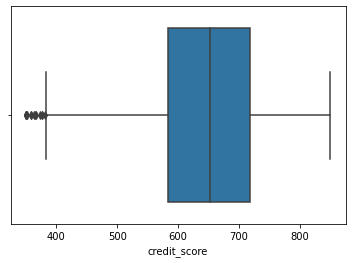

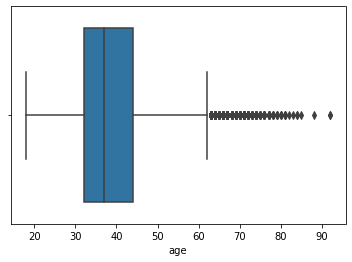

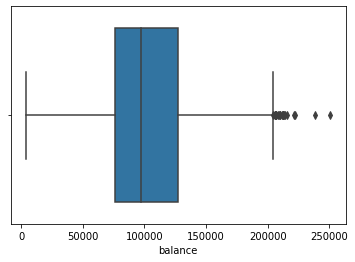

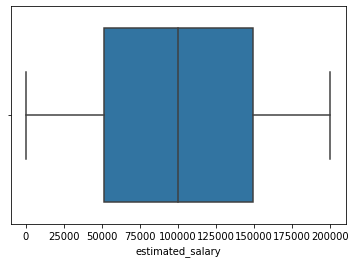

In [234]:
df = dataset[['credit_score', 'age', 'balance', 'estimated_salary']]

for column in df:
  plt.figure()
  sns.boxplot(data=df, x=column)

dropping outliers for credit_score column


In [235]:
Q1 = dataset['credit_score'].quantile(0.25)
Q3 = dataset['credit_score'].quantile(0.75)
IQR = Q3-Q1
lower_lim = Q1-1.5*IQR
upper_lim = Q3+1.5*IQR
print("lower limit: ", lower_lim, "and upper limit: ", upper_lim)

lower limit:  383.0 and upper limit:  919.0


In [236]:
outliers_low1 = (dataset['credit_score'] < lower_lim)
outliers_up1 = (dataset['credit_score'] > upper_lim)
dataset = dataset[~(outliers_low1 | outliers_up1)]
dataset.shape

(9985, 11)

dropping outliers for 'balance' column

In [237]:
Q1 = dataset['balance'].quantile(0.25)
Q3 = dataset['balance'].quantile(0.75)
IQR = Q3-Q1
lower_lim = Q1-1.5*IQR
upper_lim = Q3+1.5*IQR
print("lower limit: ", lower_lim, "and upper limit: ", upper_lim)

lower limit:  -242.15677999999025 and upper limit:  204365.966068


In [238]:
outliers_low2 = (dataset['balance'] < lower_lim)
outliers_up2 = (dataset['balance'] > upper_lim)
dataset = dataset[~(outliers_low2 | outliers_up2)]
dataset.shape

(9961, 11)

Univariate Analysis

Categorical Analysis

In [239]:
categorical_features = ['country', 'gender', 'tenure', 'products_number', 'credit_card', 'active_member', 'churn']
numerical_features = ['credit_score', 'age', 'balance', 'estimated_salary']

Checking total and percentage of every column

In [240]:
for features in categorical_features:
  count = dataset[features].value_counts()
  percent = 100*dataset[features].value_counts(normalize=True)
  df = pd.DataFrame({'total sample': count, 'percentage': percent.round(1)})
  print(df)

         total sample  percentage
France           4997        50.2
Germany          2501        25.1
Spain            2463        24.7
        total sample  percentage
Male            5439        54.6
Female          4522        45.4
    total sample  percentage
2           1044        10.5
1           1032        10.4
7           1025        10.3
8           1023        10.3
5           1011        10.1
3           1002        10.1
4            983         9.9
9            981         9.8
6            962         9.7
10           489         4.9
0            409         4.1
   total sample  percentage
1          5057        50.8
2          4582        46.0
3           263         2.6
4            59         0.6
   total sample  percentage
1          7033        70.6
0          2928        29.4
   total sample  percentage
1          5135        51.6
0          4826        48.4
   total sample  percentage
0          7953        79.8
1          2008        20.2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

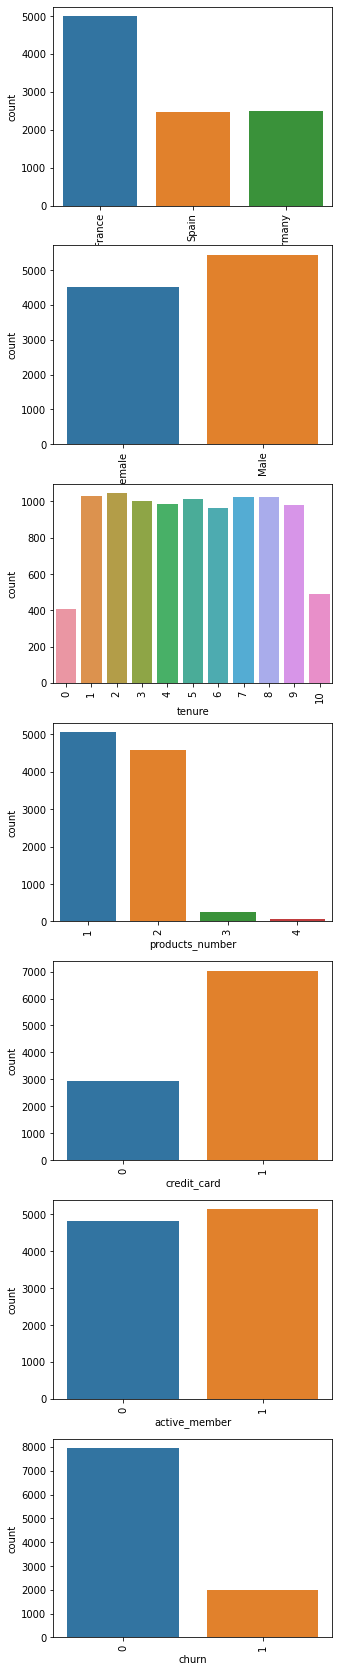

In [241]:
fig, ax = plt.subplots(7, 1, figsize=(5, 30))
for variable, subplot in zip(categorical_features, ax.flatten()):
    sns.countplot(dataset[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Numerical Features

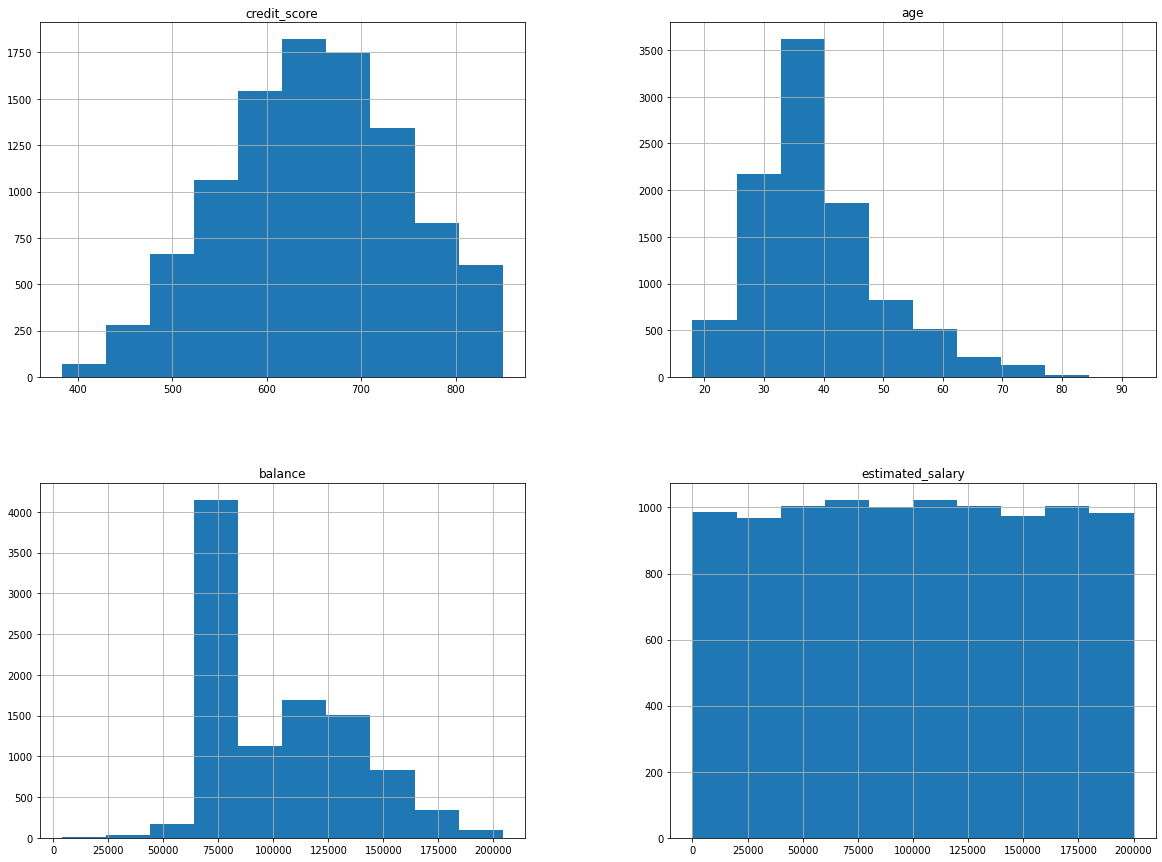

In [242]:
dataset.hist(['credit_score', 'age', 'balance', 'estimated_salary'], figsize=(20, 15))
plt.show()

Multivariate Analysis

Categrical Features

In [243]:
categorical_features2 = ['country', 'gender', 'tenure', 'products_number', 'credit_card', 'active_member']

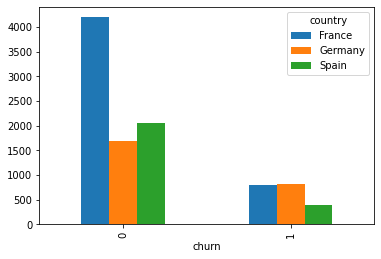

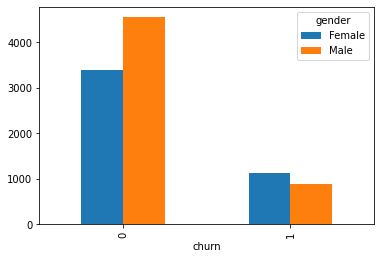

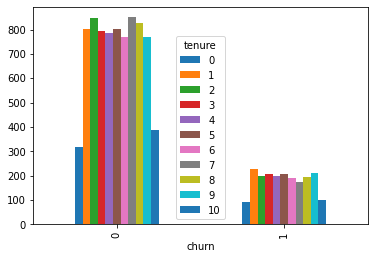

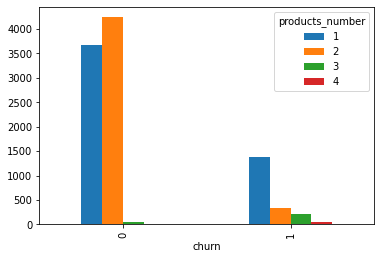

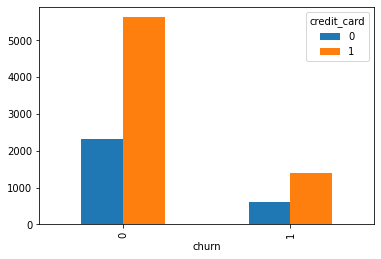

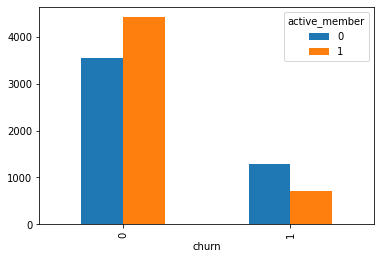

In [244]:
for col in categorical_features2:
  CrosstabResult=pd.crosstab(index=dataset['churn'], columns=dataset[col])
  CrosstabResult.plot.bar()

Numerical Features

drop all the categorical features to only plot the numerical features

In [245]:
dataset_num = dataset.drop(categorical_features, axis=1)

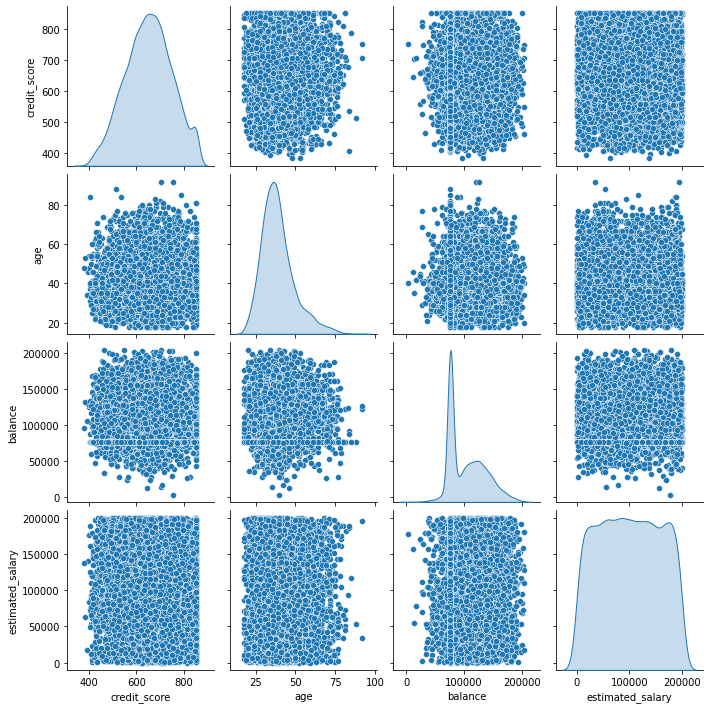

In [246]:
sns.pairplot(dataset_num, diag_kind="kde")

Data Preprocessing

Encoding categorical features

In [247]:
from sklearn.preprocessing import OneHotEncoder
dataset = pd.concat([dataset, pd.get_dummies(dataset['country'], prefix='country')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['gender'], prefix='gender')], axis=1)
dataset.drop(['country', 'gender'], axis=1, inplace=True)
dataset.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,76485.889288,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.860000,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.800000,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,76485.889288,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.820000,1,1,1,79084.10,0,0,0,1,1,0


Splitting dataset into train and test data

In [248]:
from sklearn.model_selection import train_test_split

X = dataset.drop(["churn"], axis=1)
Y = dataset["churn"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

standardize numerical features

In [249]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,credit_score,age,balance,estimated_salary
786,0.393046,-1.231369,-0.879774,0.087627
546,-0.655719,-0.084367,-0.879774,-0.907267
1444,-0.697254,-0.084367,-0.879774,0.247476
2986,-0.832244,0.297967,0.115254,0.490542
6618,-0.146912,-0.944618,-0.218786,0.567234


Random Forest Classifier

In [250]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

model1 = RandomForestClassifier(n_estimators = 100, max_depth=5)
# training model
model1.fit(X_train, Y_train)
# performing prediction
pred_model1 = model1.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(Y_test, pred_model1))

Accuracy:  0.8233818364274962


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


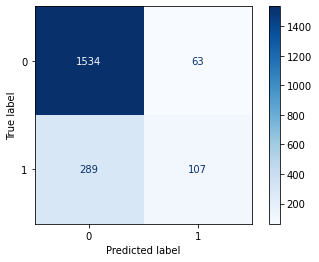

In [251]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, Y_test, cmap=plt.cm.Blues)
plt.show()

In [252]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred_model1))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1597
           1       0.63      0.27      0.38       396

    accuracy                           0.82      1993
   macro avg       0.74      0.62      0.64      1993
weighted avg       0.80      0.82      0.79      1993



K-Nearest Neighbor Classifier

In [253]:
from sklearn.neighbors import KNeighborsClassifier

# trying model for k=1 through 50 and record testing accuracy
range_k = range(1, 51)
scores = {}
list_score = []
for k in range_k:
  model2 = KNeighborsClassifier(n_neighbors = k)
  model2.fit(X_train, Y_train)
  pred_model2 = model2.predict(X_test)
  scores[k] = metrics.accuracy_score(Y_test, pred_model2)
  list_score.append(metrics.accuracy_score(Y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

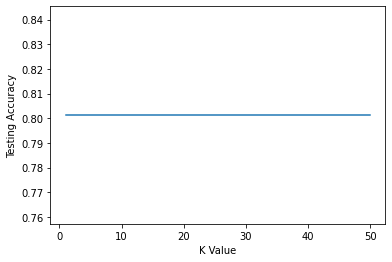

In [254]:
# plot k scores with accuracy
plt.plot(range_k, list_score)
plt.xlabel('K Value')
plt.ylabel('Testing Accuracy')

In [255]:
# we will use for k = 10
model2 = KNeighborsClassifier(n_neighbors=10)
#training model
model2.fit(X_train, Y_train)
# performing prediction
pred_model2 = model2.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(Y_test, pred_model2))

Accuracy:  0.8013045659809332


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


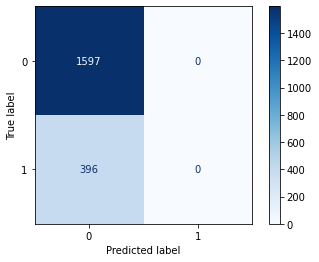

In [256]:
plot_confusion_matrix(model2, X_test, Y_test, cmap=plt.cm.Blues)
plt.show()

In [257]:
print(classification_report(Y_test, pred_model2))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1597
           1       0.00      0.00      0.00       396

    accuracy                           0.80      1993
   macro avg       0.40      0.50      0.44      1993
weighted avg       0.64      0.80      0.71      1993



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Compare and Choosing the Best Model 

As we can see, random forest classifier have higher number for accuracy and precision, but the recall score is lower than KNN model. Because of that score and the stabilization (which random forest more stabil than KNN for both 0 and 1 label) then we choose random forest model.

Test dataset

In [258]:
prediction = X_test.iloc[:1].copy()
pred = Y_test[:1]
rforest = model1.predict(prediction)
knn = model2.predict(prediction)
print("", prediction, " y_true:", pred, " random_forest:", rforest, " KNN:", knn)

       credit_score  age  tenure    balance  products_number  credit_card  \
2976           729   39       4  121404.64                1            1   

      active_member  estimated_salary  country_France  country_Germany  \
2976              1         159618.17               1                0   

      country_Spain  gender_Female  gender_Male  
2976              0              0            1    y_true: 2976    0
Name: churn, dtype: int64  random_forest: [0]  KNN: [0]
